In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [3]:
class BATSTATE(TypedDict):
    runs:int
    fours:int 
    sixs:int
    balls:int

    sr:float
    bpb:float
    boundary_percent:float
    summary:str



In [4]:
def current_sr(state : BATSTATE):

    sr = (state['runs']/state['balls'])*100

    return {'sr':sr}

In [5]:
def current_bpb(state:BATSTATE):

    bpb = state['balls']/(state['fours']+state['sixs'])

    return {'bpb':bpb}


In [6]:
def current_percent(state:BATSTATE):

    boundary_percent = (state['fours']*4+state['sixs']*6)/state['runs']

    return{'boundary_percent':boundary_percent}


In [8]:
def summary(state:BATSTATE):
    summary = f"""
Strike RATE:{state['sr']} \n
Balls per Boundary :{state['bpb']} \n
Boundary Percent :{state['boundary_percent']}
"""

In [13]:
graph = StateGraph(BATSTATE)

# ADD Nodes

graph.add_node("current_sr",current_sr)
graph.add_node("current_bpb",current_bpb)
graph.add_node("current_percent",current_percent)
graph.add_node("summary",summary)

# add edges

graph.add_edge(START,"current_sr")
graph.add_edge(START,"current_bpb")
graph.add_edge(START,"current_percent")
graph.add_edge("current_sr","summary")
graph.add_edge("current_bpb","summary")
graph.add_edge("current_percent","summary")
graph.add_edge("summary",END)

# compile

workflow = graph.compile()

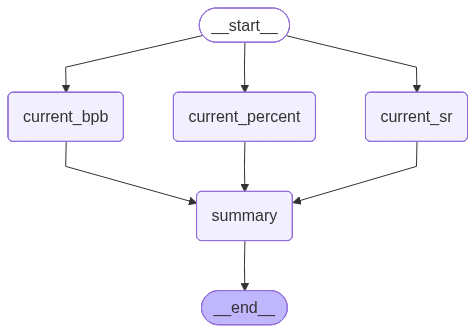

In [14]:
workflow

In [15]:
initial_state = {
    'runs':200,
    'balls':100,
    'fours':6,
    'sixs':5
}

workflow.invoke(initial_state)

{'runs': 200,
 'fours': 6,
 'sixs': 5,
 'balls': 100,
 'sr': 200.0,
 'bpb': 9.090909090909092,
 'boundary_percent': 0.27}